# SENTIMEN ANALISIS PILPRES 2024
Muchammad Fahd Ishamuddin
41155050180048

In [1]:
%matplotlib inline

import re
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collections
import nltk
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

In [2]:
data = pd.read_csv('2022pilpres.csv')
print('data ada sebanyak',len(data),'baris')
data = data.drop('Unnamed: 0', axis = 1)
data.columns
data.dtypes

data ada sebanyak 93882 baris


date         object
id          float64
tweet        object
username     object
dtype: object

In [3]:
data.isnull().sum()

date        0
id          3
tweet       3
username    6
dtype: int64

In [4]:
data = data.dropna()
data.isnull().sum()
len(data)

93876

In [5]:
data.tweet.iloc[3]

'Baru Lolos Sebagai Peserta Pemilu 2024, Partai Ummat Mau Bahas soal Dukungan Pilpres 2 Bulan Lagi https://t.co/5JDqsJAclq'

In [6]:
duplikasi = len(data.tweet)-len(data.tweet.drop_duplicates())
print(f'ada sebanyak {duplikasi} data yang terduplikasi')

ada sebanyak 3153 data yang terduplikasi


In [7]:
x = data.groupby(data.tweet.tolist(), as_index=False).size()
x.sort_values(by='size',ascending=False)


,index,size
86025,Tumbangkan rezim oligarki! Dukung aniesbasweda...,48
40994,Indonesia menolak Capres dan Cawapres yang did...,48
27176,Bersama aniesbaswedan kita tegakkan sistem khi...,47
40981,"Indonesia damai tanpa kaum intoleran, kaum rad...",47
53688,Menangkan aniesbaswedan pada #Pilpres2024! Wuj...,47
...,...,...
30360,Demokrat Dinilai Tidak Pede Bisa Usung Calon I...,1
30359,Demokrat Dinilai Tidak Pede Bisa Usung Calon I...,1
30358,Demokrat Dinilai Tidak Pede Bisa Usung Calon I...,1
30357,Demokrat Dengar Ada 'Genderuwo' Ingin Jegal An...,1


In [8]:
a = (x['size'] > 1).sum()
print(f'jadi ada tweet sebanyak {a} yang memiliki cuitan yang sama dengan total {duplikasi} tweet')

jadi ada tweet sebanyak 815 yang memiliki cuitan yang sama dengan total 3153 tweet


In [9]:
data = data.drop_duplicates(subset=['tweet'])

In [10]:
duplikasi = len(data.tweet)-len(data.tweet.drop_duplicates())
print(f'ada sebanyak {duplikasi} data yang terduplikasi')

ada sebanyak 0 data yang terduplikasi


In [11]:
x = data.groupby(data.tweet.tolist(), as_index=False).size()
x.sort_values(by='size',ascending=False)

,index,size
0,! Boom ! Airlangga - Ganjar pasangan ideal di ...,1
60511,"PPP Riau Pasang Foto Anies Baswedan , Bakal Us...",1
60487,"PPP Masih Pertimbangkan Erick, Ganjar, Sandiag...",1
60486,PPP Maluku Usulkan Duet Ganjar-Anies di Pilpre...,1
60485,PPP Maluku Usulkan Duet Ganjar-Anies di Pilpre...,1
...,...,...
30239,"Demokrat Buka Pintu, Undang Parpol Lain Berkoa...",1
30238,Demokrat Bongkar Faktor yang Bikin Publik Bosa...,1
30237,Demokrat Bidik Anies Baswedan sebagai Bacapres...,1
30236,Demokrat Bersyukur AHY Dianggap Pantas Jadi Ca...,1


In [12]:
len(data)

90723

In [13]:
x= data.username
c={}
q=0
for name in x:
    c[name] = c.get(name,0)+1
# print(c)
c = pd.DataFrame({'usename':c.keys(),'count':c.values()})
print (c)
c.info()
c.to_csv('username_count1.csv')
data.username.value_counts()

               usename  count
0            Fuad_Lha9     21
1          iwan_tata98      4
2            Lima8Satu     33
3      21BeritaTerkini    204
4          rezakaisar3      4
...                ...    ...
21876        EdwinSltg      1
21877     MemenWongso3      1
21878    wahyu_minarno      1
21879        Azhari25_      1
21880       ninovendri      1

[21881 rows x 2 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21881 entries, 0 to 21880
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   usename  21881 non-null  object
 1   count    21881 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 342.0+ KB


jpnncom          1121
fajaronline       984
detikcom          654
WartaEkonomi      644
Indopolitika      449
                 ... 
nonafren21          1
adaaaqua1           1
ajinoera            1
Jundi72717202       1
ninovendri          1
Name: username, Length: 21881, dtype: int64

In [14]:
data

,date,id,tweet,username
0,2022-12-30 23:50:32+00:00,1.608974e+18,"Berkat kinerja di BUMN, serta kedekatan dengan...",Fuad_Lha9
1,2022-12-30 23:50:16+00:00,1.608974e+18,@ganjarpranowo menggandeng ulama hingga tokoh ...,iwan_tata98
2,2022-12-30 23:40:27+00:00,1.608971e+18,Mantap 👍👍\nElektabilitas Menteri BUMN Erick Th...,Lima8Satu
3,2022-12-30 23:36:07+00:00,1.608970e+18,"Baru Lolos Sebagai Peserta Pemilu 2024, Partai...",21BeritaTerkini
4,2022-12-30 23:26:47+00:00,1.608968e+18,Agenda politik negara tuan rumah Piala Dunia 2...,rezakaisar3
...,...,...,...,...
93877,2022-01-01 03:05:00+00:00,1.477114e+18,PA 212 Novel Bamukmin mengaku sudah mantap ma...,sjahtie
93878,2022-01-01 02:24:46+00:00,1.477103e+18,PKS Ingin Ada 3 Poros Koalisi di Pilpres 2024 ...,jawapos
93879,2022-01-01 02:08:17+00:00,1.477099e+18,"@Listy9021 @BNPTRI @BPIPRI MET tahun baru Sis,...",BANGSAygSUJUD
93880,2022-01-01 00:38:55+00:00,1.477077e+18,"Bursa Pilpres 2024, Anies Baswedan Makin Melej...",teropongmetro


In [15]:
def preprocess_tweet2(tweet):
    EMOJI_PATTERN = re.compile(
    "(["
    "\U0001F1E0-\U0001F1FF"  # flags (iOS)
    "\U0001F300-\U0001F5FF"  # symbols & pictographs
    "\U0001F600-\U0001F64F"  # emoticons
    "\U0001F680-\U0001F6FF"  # transport & map symbols
    "\U0001F700-\U0001F77F"  # alchemical symbols
    "\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
    "\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
    "\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
    "\U0001FA00-\U0001FA6F"  # Chess Symbols
    "\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
    "\U00002702-\U000027B0"  # Dingbats
    "])")
    tweet = re.sub(r'[0-9]+','', str(tweet))
    tweet = tweet.lower()  # convert to lower case
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags=re.MULTILINE)  # remove URLs
    tweet = re.sub(r'\@\w+|\#\w+', '', tweet)  # remove mentions and hashtags
    tweet = re.sub(r'\d+', '', tweet) # remove numbers
    tweet = re.sub(r'\.',' ', tweet) #
    tweet = tweet.translate(str.maketrans("", "", string.punctuation))  # remove punctuations
    tweet = tweet.strip()
    tweet = re.sub(EMOJI_PATTERN, r'', tweet)
    tweet = re.sub(r'\n+', '', tweet)
    tweet = re.sub(r'\brt', '', tweet)
    return tweet
data['tweet']=data['tweet'].apply(preprocess_tweet2)

In [16]:
data.tweet.iloc[3]

'baru lolos sebagai peserta pemilu  partai ummat mau bahas soal dukungan pilpres  bulan lagi'

In [17]:
from tqdm import tqdm
data['tweet'] = tqdm(data['tweet'].apply(preprocess_tweet2))

100%|██████████| 90723/90723 [00:00<00:00, 1127930.74it/s]


In [18]:
data

,date,id,tweet,username
0,2022-12-30 23:50:32+00:00,1.608974e+18,berkat kinerja di bumn serta kedekatan dengan ...,Fuad_Lha9
1,2022-12-30 23:50:16+00:00,1.608974e+18,menggandeng ulama hingga tokoh agama dalam mem...,iwan_tata98
2,2022-12-30 23:40:27+00:00,1.608971e+18,mantap elektabilitas menteri bumn erick thohir...,Lima8Satu
3,2022-12-30 23:36:07+00:00,1.608970e+18,baru lolos sebagai peserta pemilu partai umma...,21BeritaTerkini
4,2022-12-30 23:26:47+00:00,1.608968e+18,agenda politik negara tuan rumah piala dunia ...,rezakaisar3
...,...,...,...,...
93877,2022-01-01 03:05:00+00:00,1.477114e+18,pa novel bamukmin mengaku sudah mantap maju ...,sjahtie
93878,2022-01-01 02:24:46+00:00,1.477103e+18,pks ingin ada poros koalisi di pilpres,jawapos
93879,2022-01-01 02:08:17+00:00,1.477099e+18,met tahun baru sis semoga tahun ini damai meli...,BANGSAygSUJUD
93880,2022-01-01 00:38:55+00:00,1.477077e+18,bursa pilpres anies baswedan makin melejit l...,teropongmetro


In [19]:
duplikasi = len(data.tweet)-len(data.tweet.drop_duplicates())
print(f'ada sebanyak {duplikasi} data yang terduplikasi')

ada sebanyak 14968 data yang terduplikasi


In [20]:
data = data.drop_duplicates(subset=['tweet'])

duplikasi = len(data.tweet)-len(data.tweet.drop_duplicates())
print(f'ada sebanyak {duplikasi} data yang terduplikasi')

ada sebanyak 0 data yang terduplikasi


In [21]:
from nltk.tokenize import word_tokenize

def tokenize_column(text):
    if isinstance(text, str):  # Memastikan bahwa text adalah string
        return word_tokenize(text)
    else:
        return []  # Mengembalikan list kosong jika text bukan string

# Contoh penggunaan:
data['tweet'] = data['tweet'].apply(tokenize_column)

KeyboardInterrupt: 

In [ ]:
data

,date,id,tweet,username
0,2022-12-30 23:50:32+00:00,1.608974e+18,"[berkat, kinerja, di, bumn, serta, kedekatan, ...",Fuad_Lha9
1,2022-12-30 23:50:16+00:00,1.608974e+18,"[menggandeng, ulama, hingga, tokoh, agama, dal...",iwan_tata98
2,2022-12-30 23:40:27+00:00,1.608971e+18,"[mantap, elektabilitas, menteri, bumn, erick, ...",Lima8Satu
3,2022-12-30 23:36:07+00:00,1.608970e+18,"[baru, lolos, sebagai, peserta, pemilu, partai...",21BeritaTerkini
4,2022-12-30 23:26:47+00:00,1.608968e+18,"[agenda, politik, negara, tuan, rumah, piala, ...",rezakaisar3
...,...,...,...,...
112839,2022-01-01 02:06:49+00:00,1.477099e+18,"[aneh, nih, orang, hoax, waktu, pilpres, masih...",laelatul
112840,2022-01-01 01:55:42+00:00,1.477096e+18,"[hahahahaha, bls, tweet, anda, niiih, menunjuk...",amira_suud
112841,2022-01-01 01:49:00+00:00,1.477094e+18,"[wkwkwkwkwkwwk, junjungan, nya, keok, pilpres,...",samuelmengi86
112842,2022-01-01 00:38:55+00:00,1.477077e+18,"[bursa, pilpres, anies, baswedan, makin, melej...",teropongmetro


In [ ]:
len(data)

96201

In [ ]:
stemmer = StemmerFactory().create_stemmer()
stopword_remover = StopWordRemoverFactory().create_stop_word_remover()
def stem_stopword(batch):
    # Menerapkan stemming pada setiap teks dalam batch
    stemmed_batch = [stemmer.stem(text) for text in batch]

    # Melakukan penghapusan stopwords pada setiap teks dalam batch
    cleaned_batch = [stopword_remover.remove(text) for text in stemmed_batch]

    return cleaned_batch

# Ukuran batch yang diinginkan
batch_size = 1000

# Menghitung jumlah batch yang diperlukan
num_batches = len(data) // batch_size + 1

preprocessed_data = []
for i in range(num_batches):
    start_idx = i * batch_size
    end_idx = (i + 1) * batch_size
    batch_data = data['tweet'].iloc[start_idx:end_idx].astype(str)

    preprocessed_batch = stem_stopword(batch_data)
    preprocessed_data.extend(preprocessed_batch)

# Menambahkan hasil preprocessing ke dalam DataFrame
data['tweet'] = preprocessed_data

# Hasil preprocessing data
print(data)

                             date            id  \
0       2022-12-30 23:50:32+00:00  1.608974e+18   
1       2022-12-30 23:50:16+00:00  1.608974e+18   
2       2022-12-30 23:40:27+00:00  1.608971e+18   
3       2022-12-30 23:36:07+00:00  1.608970e+18   
4       2022-12-30 23:26:47+00:00  1.608968e+18   
...                           ...           ...   
112839  2022-01-01 02:06:49+00:00  1.477099e+18   
112840  2022-01-01 01:55:42+00:00  1.477096e+18   
112841  2022-01-01 01:49:00+00:00  1.477094e+18   
112842  2022-01-01 00:38:55+00:00  1.477077e+18   
112843  2022-01-01 00:37:00+00:00  1.477076e+18   

                                                    tweet         username  
0       berkat bumn perintah elektabilitas tingkat das...        Fuad_Lha9  
1       gandeng ulama tokoh agama suasana adem jelang ...      iwan_tata98  
2       mantap elektabilitas menteri bumn erick thohir...        Lima8Satu  
3            lolos milu partai ummat bahas dukung pilpres  21BeritaTerkini  
4 

/var/folders/md/n3wx2h2116zfry84m6sz4k5w0000gn/T/ipykernel_46923/29094851.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tweet'] = preprocessed_data


In [ ]:
data.to_csv('scrap_stoop1.csv')

In [22]:
duplikasi = len(data.tweet)-len(data.tweet.drop_duplicates())
print(f'ada sebanyak {duplikasi} data yang terduplikasi')

ada sebanyak 0 data yang terduplikasi


In [23]:
data = data.drop_duplicates(subset=['tweet'])

duplikasi = len(data.tweet)-len(data.tweet.drop_duplicates())
print(f'ada sebanyak {duplikasi} data yang terduplikasi')

ada sebanyak 0 data yang terduplikasi


In [24]:
data.isnull().sum()

date        0
id          0
tweet       0
username    0
dtype: int64

In [112]:
data.to_csv('stemstopclean1.csv')

In [3]:
data = pd.read_csv('stemstopclean.csv')

In [25]:
data = data.dropna()
print(data.isnull().sum())
len(data)

date        0
id          0
tweet       0
username    0
dtype: int64


75755

In [22]:
len(data)

73260

In [126]:
# def tokenize_column(text):
#     if isinstance(text, str):  # Memastikan bahwa text adalah string
#         return word_tokenize(text)
#     else:
#         return []  # Mengembalikan list kosong jika text bukan string

# # Contoh penggunaan:
# data['tweet'] = data['tweet'].apply(tokenize_column)

In [226]:
# bar = data[data['tweet'].str.contains('golkar')]
# print(len(bar))

1656


In [26]:
from nltk.tokenize import word_tokenize
def labelling(tweet):
    # tweet = preprocess_tweet(tweet)
    clean_tokens = word_tokenize(tweet) #tokenize
    # clean_tokens = [stemmer.stem(word) for word in tweet_tokens if word not in stopwords] #stemming & stopword removal
    positive_words = open("positive.txt").read().splitlines()
    negative_words = open("negative.txt").read().splitlines()
    positive_count = sum([1 for word in clean_tokens if word in positive_words])
    negative_count = sum([1 for word in clean_tokens if word in negative_words])
    if positive_count > negative_count:
        return 'Positive'
    elif positive_count < negative_count:
        return 'Negative'
    else:
        return 'Neutral'
data['sentiment'] = data['tweet'].apply(labelling)

In [56]:
%pip install sastrawi

Note: you may need to restart the kernel to use updated packages.


In [58]:
from Sastrawi.Normalisasi import Normalisasi
teks = "Saya mau bljr yg bner"

# Normalisasi teks
teks_normalisasi = norm().normalize(teks)

# Output hasil normalisasi
print(teks_normalisasi)

ModuleNotFoundError: No module named 'Sastrawi.Normalisasi'

In [285]:
data=data.drop(columns=['level_0','index'])
data

KeyError: "['level_0', 'index'] not found in axis"

In [1]:
data.to_csv('datasiap2.csv')

NameError: name 'data' is not defined

In [27]:
data

,date,id,tweet,username,sentiment
0,2022-12-30 23:50:32+00:00,1.608974e+18,berkat kinerja di bumn serta kedekatan dengan ...,Fuad_Lha9,Positive
1,2022-12-30 23:50:16+00:00,1.608974e+18,menggandeng ulama hingga tokoh agama dalam mem...,iwan_tata98,Positive
2,2022-12-30 23:40:27+00:00,1.608971e+18,mantap elektabilitas menteri bumn erick thohir...,Lima8Satu,Neutral
3,2022-12-30 23:36:07+00:00,1.608970e+18,baru lolos sebagai peserta pemilu partai umma...,21BeritaTerkini,Positive
4,2022-12-30 23:26:47+00:00,1.608968e+18,agenda politik negara tuan rumah piala dunia ...,rezakaisar3,Positive
...,...,...,...,...,...
93876,2022-01-01 03:29:34+00:00,1.477120e+18,mbak puan memang keren sekali rakyat tidak han...,AswanaAktivix,Positive
93877,2022-01-01 03:05:00+00:00,1.477114e+18,pa novel bamukmin mengaku sudah mantap maju ...,sjahtie,Negative
93879,2022-01-01 02:08:17+00:00,1.477099e+18,met tahun baru sis semoga tahun ini damai meli...,BANGSAygSUJUD,Positive
93880,2022-01-01 00:38:55+00:00,1.477077e+18,bursa pilpres anies baswedan makin melejit l...,teropongmetro,Negative


In [29]:
data.sentiment.value_counts()

Positive    35299
Neutral     25393
Negative    15063
Name: sentiment, dtype: int64

In [30]:
data = data.reset_index()

In [31]:
len(data)

75755

In [32]:
data.tweet.iloc[3]

'baru lolos sebagai peserta pemilu  partai ummat mau bahas soal dukungan pilpres  bulan lagi'

In [33]:
data

,index,date,id,tweet,username,sentiment
0,0,2022-12-30 23:50:32+00:00,1.608974e+18,berkat kinerja di bumn serta kedekatan dengan ...,Fuad_Lha9,Positive
1,1,2022-12-30 23:50:16+00:00,1.608974e+18,menggandeng ulama hingga tokoh agama dalam mem...,iwan_tata98,Positive
2,2,2022-12-30 23:40:27+00:00,1.608971e+18,mantap elektabilitas menteri bumn erick thohir...,Lima8Satu,Neutral
3,3,2022-12-30 23:36:07+00:00,1.608970e+18,baru lolos sebagai peserta pemilu partai umma...,21BeritaTerkini,Positive
4,4,2022-12-30 23:26:47+00:00,1.608968e+18,agenda politik negara tuan rumah piala dunia ...,rezakaisar3,Positive
...,...,...,...,...,...,...
75750,93876,2022-01-01 03:29:34+00:00,1.477120e+18,mbak puan memang keren sekali rakyat tidak han...,AswanaAktivix,Positive
75751,93877,2022-01-01 03:05:00+00:00,1.477114e+18,pa novel bamukmin mengaku sudah mantap maju ...,sjahtie,Negative
75752,93879,2022-01-01 02:08:17+00:00,1.477099e+18,met tahun baru sis semoga tahun ini damai meli...,BANGSAygSUJUD,Positive
75753,93880,2022-01-01 00:38:55+00:00,1.477077e+18,bursa pilpres anies baswedan makin melejit l...,teropongmetro,Negative


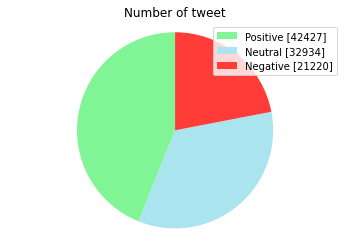

In [34]:
p = 42427
net = 32934
neg = 21220
labels = ['Positive ['+str(p)+']' , 'Neutral ['+str(net)+']','Negative ['+str(neg)+']']
size = [p,net,neg]
colors = ["#81F495","#A9E4EF","#FF3C38"]
patches, texts = plt.pie(size, colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title('Number of tweet')
plt.axis('equal')
plt.show()

In [76]:
# X_train.shape
# X_train.shape
# y_train.shape
X_test.shape
# y_test.shape

(381, 3283)

In [36]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, plot_confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

vectorizer = CountVectorizer()

# Melakukan transformasi teks menjadi vektor fitur
X = vectorizer.fit_transform(data['tweet'].astype(str))
# Y = vectorizer.fit_transform(data['sentiment'])

epoch = 3
accuracy_values = np.zeros(epoch)
# Membagi data menjadi data latih dan data uji
for epochs in range(epoch):
    X_train, X_test, y_train, y_test = train_test_split(X, data['sentiment'], test_size=0.2, random_state=None)
    naive_bayes = MultinomialNB()
    training = naive_bayes.fit(X_train, y_train)
    prediction =  naive_bayes.predict(X_test)

    accuracy = accuracy_score(y_test, prediction)
    accuracy_values[epochs] = accuracy

    print("epoch:", epochs + 1, "acc:", accuracy)
plt.plot(range(1,epoch + 1), accuracy_values, marker='o')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.title('ACC per Epoch')
plt.show()



y_pred = naive_bayes.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi: {:.2f}%".format(accuracy * 100))

In [71]:
data.tweet.iloc[0]

'berkat bumn perintah elektabilitas tingkat dasar nilai cawapres kuat pilpres'

In [72]:
print(X)


  (0, 3941)	1
  (0, 5440)	1
  (0, 28070)	1
  (0, 9588)	1
  (0, 37201)	1
  (0, 7168)	1
  (0, 25384)	1
  (0, 5997)	1
  (0, 18740)	1
  (0, 28573)	1
  (1, 28573)	1
  (1, 10883)	1
  (1, 38211)	1
  (1, 37404)	1
  (1, 393)	1
  (1, 35119)	1
  (1, 271)	1
  (1, 14965)	2
  (1, 22853)	1
  (1, 14795)	1
  (1, 10912)	1
  (1, 27997)	1
  (1, 9383)	1
  (1, 21125)	1
  (2, 5440)	1
  :	:
  (73257, 21118)	1
  (73257, 2530)	1
  (73257, 7012)	1
  (73257, 25574)	1
  (73257, 15810)	1
  (73258, 28573)	1
  (73258, 14965)	1
  (73258, 22853)	1
  (73258, 35827)	3
  (73258, 23353)	1
  (73258, 28533)	1
  (73258, 19831)	1
  (73258, 30702)	1
  (73258, 7066)	1
  (73258, 34253)	1
  (73258, 39123)	1
  (73258, 37043)	1
  (73258, 22669)	1
  (73258, 6115)	1
  (73259, 28573)	1
  (73259, 37404)	1
  (73259, 29838)	1
  (73259, 28913)	1
  (73259, 28505)	1
  (73259, 18728)	1


Iterasi 1: 0.6823667627897042
Iterasi 2: 0.6845028302894371
Iterasi 3: 0.6851970522268503
Iterasi 4: 0.6904838192886895
Iterasi 5: 0.6885079568514365
Iterasi 6: 0.6868525045391435
Iterasi 7: 0.6886681619139164
Iterasi 8: 0.6798034817900246
Iterasi 9: 0.6827939762896508
Iterasi 10: 0.685464060664317
Iterasi 11: 0.6853572572893304
Iterasi 12: 0.6759051586030118
Iterasi 13: 0.6886681619139164
Iterasi 14: 0.6853572572893304
Iterasi 15: 0.6834347965395706
Iterasi 16: 0.6869059062266367
Iterasi 17: 0.6757449535405319
Iterasi 18: 0.6897895973512763
Iterasi 19: 0.6911246395386095
Iterasi 20: 0.6866922994766634
Iterasi 21: 0.6885079568514365
Iterasi 22: 0.6903236142262096
Iterasi 23: 0.6875467264765567
Iterasi 24: 0.6862650859767169
Iterasi 25: 0.6807113104774111
Iterasi 26: 0.6792694649150913
Iterasi 27: 0.6819929509772509
Iterasi 28: 0.6798568834775179
Iterasi 29: 0.6899498024137563
Iterasi 30: 0.6924062800384492
Iterasi 31: 0.689736195663783
Iterasi 32: 0.6842892235394639
Iterasi 33: 0.68060

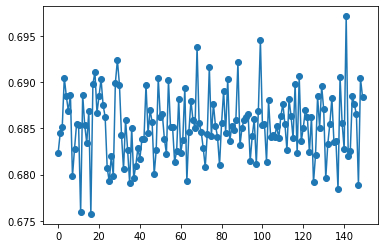

In [134]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
shuffle_split = ShuffleSplit(n_splits=150, test_size=0.2, random_state=None)

# Melakukan cross-validation dengan ShuffleSplit
scores = cross_val_score(naive_bayes, X, data['sentiment'], cv=shuffle_split, scoring='accuracy')
x = []
# Menampilkan skor akurasi untuk setiap iterasi cross-validation
for i, score in enumerate(scores):
    print(f"Iterasi {i+1}: {score}")
    x.append(score)

# Menampilkan rata-rata skor akurasi dari cross-validation
print(len(x))
print("Rata-rata skor akurasi: {:.2f} %".format(scores.mean()*100))
print("Skor tertinggi: {:.2f} %".format(scores.max()*100))
plt.plot(range(len(x)), x, marker='o')

In [135]:
acc_mnb = accuracy_score(y_test, y_pred)
print("Accuracy: {0:.4f}".format(acc_mnb))

conf_matrix_mnb = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n {}".format(conf_matrix_mnb))
print(classification_report(y_test, y_pred))

Accuracy: 0.6826
Confusion matrix:
 [[1380 2198  203]
 [ 255 5863 1584]
 [  87 1616 5540]]
              precision    recall  f1-score   support

    Negative       0.80      0.36      0.50      3781
     Neutral       0.61      0.76      0.67      7702
    Positive       0.76      0.76      0.76      7243

    accuracy                           0.68     18726
   macro avg       0.72      0.63      0.65     18726
weighted avg       0.70      0.68      0.67     18726



[[1380 2198  203]
 [ 255 5863 1584]
 [  87 1616 5540]]


/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


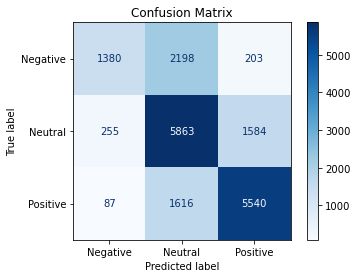

In [136]:
class_names = sorted(data['sentiment'].unique())
disp = plot_confusion_matrix(training, X_test, y_test,
                              display_labels=class_names,
                              cmap=plt.cm.Blues, values_format='d')
disp.ax_.set_title("Confusion Matrix")
print(disp.confusion_matrix)

plt.show()

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


[[12456  3775   524]
 [ 4519 25185  5200]
 [ 2368  3411 26825]]


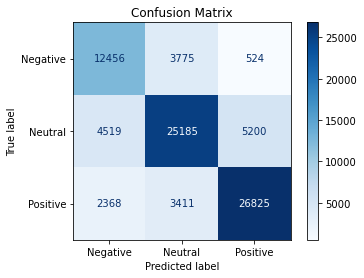

In [130]:
class_names = sorted(data['sentiment'].unique())
disp = plot_confusion_matrix(training, X_train, y_train,
                              display_labels=class_names,
                              cmap=plt.cm.Blues, values_format='d')
disp.ax_.set_title("Confusion Matrix")
print(disp.confusion_matrix)

plt.show()

In [137]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Melakukan prediksi pada data uji
y_pred = naive_bayes.predict(X_test)

# Menghitung dan menampilkan akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi:{:.2f}%".format(accuracy * 100))

# Menghitung dan menampilkan presisi
precision = precision_score(y_test, y_pred, average='weighted')
print("Presisi: {:.2f}%".format(precision * 100))

# Menghitung dan menampilkan recall
recall = recall_score(y_test, y_pred, average='weighted')
print("Recall:{:.2f}%".format(recall * 100))

# Menghitung dan menampilkan F1-score
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1-score:{:.2f}%".format(f1 * 100))
positive_count = (y_pred == 'Positive').sum()
negative_count = (y_pred == 'Negative').sum()
neutral_count = (y_pred == 'Neutral').sum()
total_count = len(y_pred)
positive_percentage = (positive_count / total_count) * 100
negative_percentage = (negative_count / total_count) * 100
neutral_percentage = (neutral_count / total_count) * 100
    # Tampilkan hasil
print("Persentase Klasifikasi:")
print("Positif: {:.1f}%".format(positive_percentage))
print("Negatif: {:.1f}%".format(negative_percentage))
print("Netral: {:.1f}%".format(neutral_percentage))

Akurasi:68.26%
Presisi: 70.35%
Recall:68.26%
F1-score:67.29%
Persentase Klasifikasi:
Positif: 39.1%
Negatif: 9.2%
Netral: 51.7%


In [138]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Melakukan prediksi pada data uji
y_pred = naive_bayes.predict(X_train)

# Menghitung dan menampilkan akurasi
accuracy1 = accuracy_score(y_train, y_pred)
print("Akurasi:{:.2f}%".format(accuracy1 * 100))

# Menghitung dan menampilkan presisi
precision1 = precision_score(y_train, y_pred, average='weighted')
print("Presisi: {:.2f}%".format(precision1 * 100))

# Menghitung dan menampilkan recall
recall1 = recall_score(y_train, y_pred, average='weighted')
print("Recall:{:.2f}%".format(recall1 * 100))

# Menghitung dan menampilkan F1-score
f11 = f1_score(y_train, y_pred, average='weighted')
print("F1-score:{:.2f}%".format(f11 * 100))
positive_count = (y_pred == 'Positive').sum()
negative_count = (y_pred == 'Negative').sum()
neutral_count = (y_pred == 'Neutral').sum()
total_count = len(y_pred)
positive_percentage = (positive_count / total_count) * 100
negative_percentage = (negative_count / total_count) * 100
neutral_percentage = (neutral_count / total_count) * 100
    # Tampilkan hasil
print("Persentase Klasifikasi:")
print("Positif: {:.1f}%".format(positive_percentage))
print("Negatif: {:.1f}%".format(negative_percentage))
print("Netral: {:.1f}%".format(neutral_percentage))

Akurasi:76.52%
Presisi: 78.40%
Recall:76.52%
F1-score:75.88%
Persentase Klasifikasi:
Positif: 39.4%
Negatif: 10.6%
Netral: 50.0%


In [141]:
print(X_test)

  (0, 22851)	1
  (0, 29836)	1
  (0, 2357)	1
  (0, 2572)	1
  (0, 3330)	2
  (0, 36236)	1
  (0, 30732)	2
  (0, 39201)	1
  (1, 28571)	1
  (1, 27136)	1
  (1, 9181)	1
  (1, 1505)	1
  (1, 3227)	1
  (1, 15298)	1
  (1, 17904)	1
  (1, 31193)	1
  (1, 12486)	1
  (2, 28571)	1
  (2, 9900)	1
  (2, 36941)	1
  (2, 20428)	1
  (2, 12406)	1
  (2, 9187)	1
  (2, 27276)	1
  (2, 4547)	1
  :	:
  (14655, 11825)	1
  (14655, 23476)	1
  (14655, 2790)	1
  (14655, 34240)	1
  (14655, 36476)	1
  (14656, 7168)	1
  (14656, 28571)	1
  (14656, 5737)	2
  (14656, 29836)	1
  (14656, 28503)	1
  (14656, 32230)	1
  (14656, 5843)	1
  (14656, 30329)	2
  (14656, 20331)	1
  (14656, 27400)	1
  (14656, 39953)	1
  (14656, 28751)	1
  (14656, 24421)	1
  (14656, 27956)	1
  (14656, 19399)	1
  (14656, 1232)	1
  (14656, 15722)	1
  (14656, 31229)	1
  (14656, 14949)	1
  (14656, 18620)	1


In [256]:
print(training.predict_proba(X_test))

[[4.92592551e-04 9.99128103e-01 3.79304137e-04]
 [4.17316959e-02 2.07432118e-01 7.50836186e-01]
 [1.76896247e-02 7.68204617e-01 2.14105758e-01]
 ...
 [2.77868872e-02 9.28564564e-01 4.36485485e-02]
 [5.97038058e-03 5.15861534e-01 4.78168085e-01]
 [2.11299176e-09 9.99160687e-01 8.39310760e-04]]


In [84]:
while True:
    # Memasukkan input teks
    input_text = input("Masukkan teks (atau ketik 'selesai' untuk keluar): ")
    
    # Keluar dari loop jika pengguna memasukkan 'selesai'
    if input_text.lower() == 'selesai':
        break
    
    # Melakukan transformasi teks input menjadi vektor fitur
    X_input = vectorizer.transform([input_text])
    
    # Melakukan prediksi pada input
    pred = naive_bayes.predict(X_input)
    positive_count = (y_pred == 'Positive').sum()
    negative_count = (y_pred == 'Negative').sum()
    neutral_count = (y_pred == 'Neutral').sum()
    na = training.predict_proba(X_input)
    # Menampilkan hasil prediksi
    print("Hasil Prediksi: ", pred[0], na)
    print()

Hasil Prediksi:  Neutral [[0.15784535 0.44017882 0.40197584]]

Hasil Prediksi:  Neutral [[0.34786897 0.4131632  0.23896783]]

Hasil Prediksi:  Neutral [[0.34786897 0.4131632  0.23896783]]

Hasil Prediksi:  Positive [[0.12578986 0.43414594 0.4400642 ]]

Hasil Prediksi:  Neutral [[0.15784535 0.44017882 0.40197584]]

Hasil Prediksi:  Neutral [[0.16266957 0.49782601 0.33950442]]



In [348]:
data.tweet.iloc[43]

'puan maharani sosok usung pdi juang capres cawapres pilpres pdip diniliai cetak sejarah andai usung puan puan capres pdip'

In [96]:
while True:
    # Memasukkan input teks
    input_text = input("Masukkan teks (atau ketik 'selesai' untuk keluar): ")
    
    # Keluar dari loop jika pengguna memasukkan 'selesai'
    if input_text.lower() == 'selesai':
        break
    
    # Melakukan transformasi teks input menjadi vektor fitur
    X_input = vectorizer.transform([input_text])
    
    # Melakukan prediksi pada input
    y_pred = naive_bayes.predict(X_input)
    
    # Menampilkan hasil prediksi
    print("Hasil Prediksi: ", y_pred[0])
    print()

Hasil Prediksi:  Neutral



In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, data['sentiment'], test_size=0.2, random_state=None)
naive_bayes = MultinomialNB()
training = naive_bayes.fit(X_train, y_train)

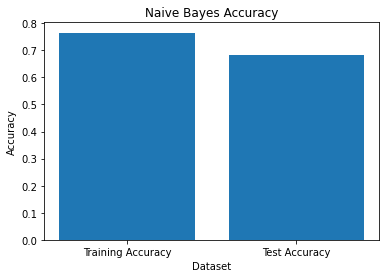

0.08261322476748878
0.7652469959946595
0.6826337712271707


In [139]:
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Melatih model Naive Bayes
model = MultinomialNB()
model.fit(X_train, y_train)

# Memprediksi label pada data latih dan data uji
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Menghitung akurasi pada data latih dan data uji
akurasi_train = accuracy_score(y_train, y_train_pred)
akurasi_test = accuracy_score(y_test, y_test_pred)

# Membuat grafik akurasi
labels = ['Training Accuracy', 'Test Accuracy']
values = [akurasi_train, akurasi_test]

plt.bar(labels, values)
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.title('Naive Bayes Accuracy')
plt.show()

print(akurasi_train - akurasi_test)
print(akurasi_train)
print(akurasi_test)

[0.17877845 0.13811199 0.12032538 0.10629419 0.09942865 0.09224606
 0.08649786 0.08259207 0.08051087 0.07799423]


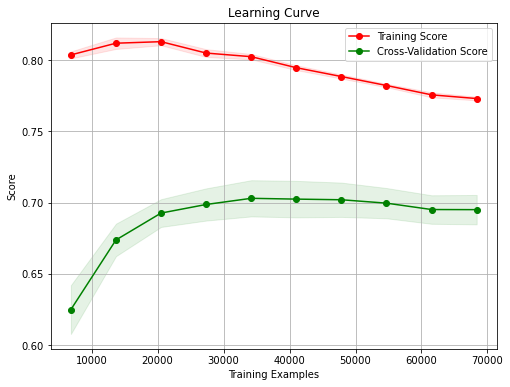

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=15, train_sizes=np.linspace(0.1, 1.0, 10))

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.title('Learning Curve')
    plt.xlabel('Training Examples')
    plt.ylabel('Score')
    plt.grid(True)
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training Score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-Validation Score')
    print(train_scores_mean - test_scores_mean)
    plt.legend(loc='best')
    plt.show()

# Contoh penggunaan
estimator = MultinomialNB()
plot_learning_curve(estimator, X, data['sentiment'])


In [342]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Latih model Naive Bayes dengan fitur-fitur yang sudah dinormalisasi
model = MultinomialNB()
model.fit(X_train_scaled, y_train)

# Evaluasi model pada data uji
accuracy = model.score(X_test_scaled, y_test)

ValueError: Cannot center sparse matrices: pass `with_mean=False` instead. See docstring for motivation and alternatives.